In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine,reflect=True)
# reflect the tables


In [26]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
newest_info = session.query(measurement.date).order_by(measurement.date.desc()).first()
newest_info

('2017-08-23')

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date>= year_ago).\
    order_by(measurement.date).all()
last_year

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_scores = pd.DataFrame(last_year,columns=["Date", "Precipitation"])
prcp_scores.set_index("Date",inplace=True)
prcp_scores

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


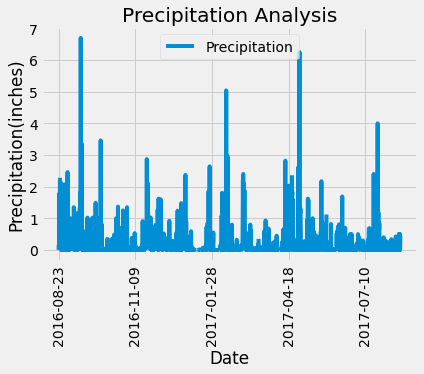

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores.plot()
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.xticks(rotation=90)
plt.show()

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()